In [1]:
import torch
import torch.nn as nn  
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Generate 200 evenly spaced values between -1 and 1, and reshape into a 2D tensor with one column
X = torch.linspace(-1, 1, 200).reshape(-1, 1)



In [3]:
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

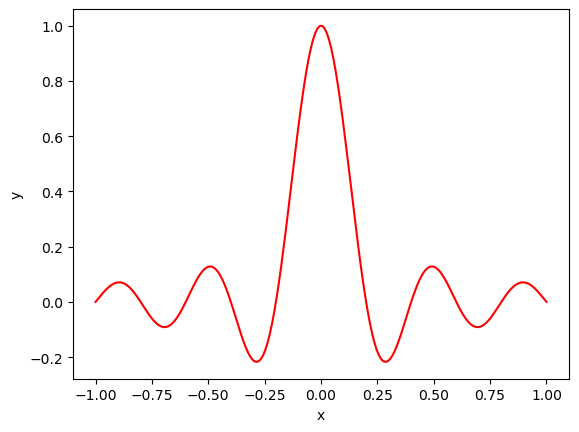

In [7]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), y.numpy(),color='Red')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [7]:
##########################################-----HW 1-1(Model 0)---------############################################

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model0(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, out_features=1):
        super(Model0, self).__init__()
        # Define the fully connected layers
        self.fc1 = nn.Linear(in_features, h2)   
        self.fc2 = nn.Linear(h2, h3)            
        self.fc3 = nn.Linear(h3, h4)            
        self.fc4 = nn.Linear(h4, h5)             
        self.fc5 = nn.Linear(h5, h6)             
        self.fc6 = nn.Linear(h6, h7)             
        self.fc7 = nn.Linear(h7, h8)           
        self.out = nn.Linear(h8, out_features) 

    def forward(self, x):
        # Pass input through each layer with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        # Return the output without activation
        x = self.out(x)
        return x


In [10]:
model_zero = Model0()

In [11]:
criterion = nn.MSELoss()

In [12]:

optimizer = torch.optim.Adam(model_zero.parameters(), lr=0.001)


In [24]:
epochs = 2000
mod0_losses = []

for epoch in range(epochs):
    y_pred = model_zero(X)
    loss = criterion(y_pred, y)
    mod0_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [30]:
# If mod0_losses already contains tensors, use clone().detach() to safely copy them
mod0_losses = mod0_losses.clone().detach()




In [20]:
##########################################-----HW 1-1(Model 1)---------############################################

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model1(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18, h4=15, h5=4, out_features=1):
        super(Model1, self).__init__()
        # Define the network layers
        self.fc1 = nn.Linear(in_features, h2)    
        self.fc2 = nn.Linear(h2, h3)             
        self.fc3 = nn.Linear(h3, h4)             
        self.fc4 = nn.Linear(h4, h5)             
        self.out = nn.Linear(h5, out_features)   

    def forward(self, x):
        # Pass through each layer with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x


In [35]:
# Create an instance of Model1
model_one = Model1()


In [36]:
model_one

Model1(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=18, bias=True)
  (fc3): Linear(in_features=18, out_features=15, bias=True)
  (fc4): Linear(in_features=15, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [37]:
# Initialize the Mean Squared Error (MSE) loss function
criterion = nn.MSELoss()



In [38]:
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.001)

In [39]:
epochs = 2000
mod1_losses = []

for epoch in range(epochs):
    # Forward pass: Predict the output using model_one
    y_pred_mod1 = model_one(X)
    
    # Compute the loss (error) between predicted and actual values
    loss = criterion(y_pred_mod1, y)
    
    # Append the current loss to the list for analysis and plotting
    mod1_losses.append(loss.item())
    
    # Zero the gradients to prevent accumulation from previous epochs
    optimizer.zero_grad()
    
    # Backpropagate the loss through the model to compute gradients
    loss.backward()
    
    # Perform an optimization step to update model weights
    optimizer.step()


In [40]:
mod1_losses=torch.tensor(mod1_losses)

In [28]:
##########################################-----HW 1-1(Model 2)---------############################################

In [41]:
import torch.nn as nn
import torch.nn.functional as F

class Model2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super(Model2, self).__init__()
        # Define the fully connected layers
        self.fc1 = nn.Linear(in_features, h2)  
        self.out = nn.Linear(h2, out_features)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x


In [42]:
model_two=Model2()

In [43]:
criterion = nn.MSELoss()


In [44]:
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.001)

In [45]:
epochs = 2000
mod2_losses = []

for epoch in range(epochs):
    # Forward pass: predict the output using model_two
    y_pred_mod2 = model_two(X)
    
    # Compute the loss (error) between predictions and actual values
    loss = criterion(y_pred_mod2, y)
    
    # Append the current loss to the list for tracking and analysis
    mod2_losses.append(loss.item())
    
    # Zero out gradients to prevent accumulation from previous epochs
    optimizer.zero_grad()
    
    # Backpropagate the loss through the model to compute gradients
    loss.backward()
    
    # Perform an optimization step to update the model's weights
    optimizer.step()


In [46]:
mod2_losses=torch.tensor(mod2_losses)

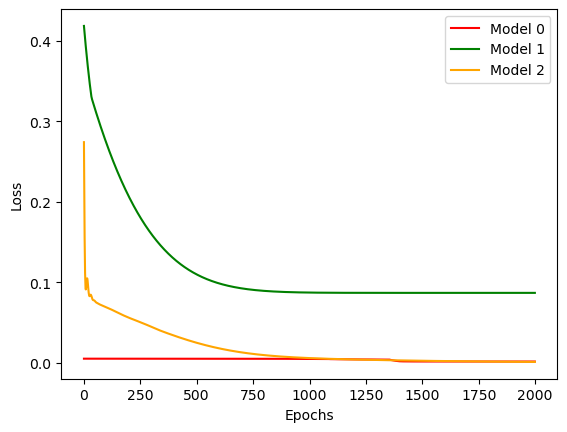

In [49]:
import matplotlib.pyplot as plt

# Plot the loss curves for all models
plt.plot(range(epochs), mod0_losses.numpy(), 'red', label='Model 0')
plt.plot(range(epochs), mod1_losses.numpy(), 'green', label='Model 1')
plt.plot(range(epochs), mod2_losses.numpy(), 'orange', label='Model 2')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Display the plot
plt.show()


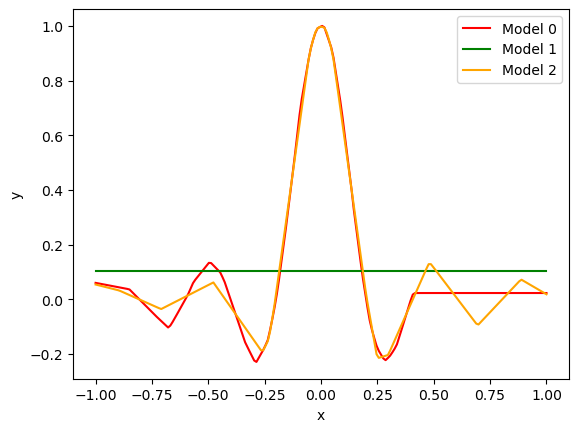

In [51]:
import matplotlib.pyplot as plt

# Plotting the predictions from all models
plt.plot(X.numpy(), y_pred.detach().numpy(), 'r', label='Model 0')  # Red for Model 0
plt.plot(X.numpy(), y_pred_mod1.detach().numpy(), 'g', label='Model 1')  # Green for Model 1
plt.plot(X.numpy(), y_pred_mod2.detach().numpy(), 'orange', label='Model 2')  # Orange for Model 2
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
# Display the plot
plt.show()


In [37]:
##########################################-----HW 1-1(Model 0) Function-2 ---------############################################

In [52]:
import torch
import torch.nn as nn  
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Generate 150 evenly spaced values between -1 and 1, then reshape into a 2D tensor with one column
X1 = torch.linspace(-1, 1, 150).reshape(-1, 1)


In [54]:
y1=np.sign(np.sin(5*np.pi*X1))

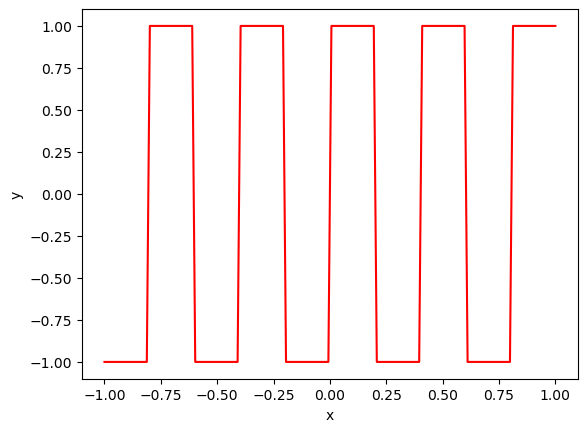

In [55]:
import matplotlib.pyplot as plt

# Plotting X1 against y1
plt.plot(X1.numpy(), y1.numpy(),color='Red')
plt.ylabel('y')
plt.xlabel('x')
# Display the plot
plt.show()



In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Modelzf2(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, out_features=1):
        super(Modelzf2, self).__init__()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features, h2)   
        self.fc2 = nn.Linear(h2, h3)            
        self.fc3 = nn.Linear(h3, h4)             
        self.fc4 = nn.Linear(h4, h5)           
        self.fc5 = nn.Linear(h5, h6)           
        self.fc6 = nn.Linear(h6, h7)             
        self.fc7 = nn.Linear(h7, h8)             
        self.out = nn.Linear(h8, out_features)   
    def forward(self, x):
        # Pass through each layer with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        # Output layer without activation
        x = self.out(x)
        return x


In [57]:
model_zero_f2=Modelzf2()   
         

In [58]:

total_params = 0
for param in model_zero_f2.parameters():
    total_params += param.numel()

print("Number of parameters in the model:", total_params)


Number of parameters in the model: 571


In [59]:
criterion = nn.MSELoss()

In [60]:

optimizer = torch.optim.Adam(model_zero_f2.parameters(), lr=0.001)

In [61]:
epochs = 2000
mod0_losses_f2 = []

for epoch in range(epochs):
    # Forward pass: compute predictions using model_zero_f2
    y_pred_mod0_f2 = model_zero_f2(X1)
    
    # Compute the loss (error) between the predicted and actual values
    loss = criterion(y_pred_mod0_f2, y1)
    
    # Append the current loss to the list for tracking and analysis
    mod0_losses_f2.append(loss.item())
    
    # Zero out gradients to prevent accumulation from previous epochs
    optimizer.zero_grad()
    
    # Backpropagate the loss to compute gradients
    loss.backward()
    
    # Perform an optimization step to update the model's weights
    optimizer.step()


In [62]:
mod0_losses_f2=torch.tensor(mod0_losses_f2)

In [49]:
##########################################-----HW 1-1(Model 1) Function-2 ---------############################################

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Modelof2(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18, h4=15, h5=4, out_features=1):
        super(Modelof2, self).__init__()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features, h2)   
        self.fc2 = nn.Linear(h2, h3)            
        self.fc3 = nn.Linear(h3, h4)           
        self.fc4 = nn.Linear(h4, h5)            
        self.out = nn.Linear(h5, out_features) 

    def forward(self, x):
        # Pass through the layers with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        # Output layer without activation
        x = self.out(x)
        return x


In [64]:
model_one_f2 = Modelof2()

In [65]:
# Calculate the total number of parameters in model_one_f2
total_params = 0
for param in model_one_f2.parameters():
    total_params += param.numel()

print("Total number of parameters in the model:", total_params)


Total number of parameters in the model: 572


In [66]:
criterion = nn.MSELoss()

In [67]:
optimizer = torch.optim.Adam(model_one_f2.parameters(), lr=0.001)

In [71]:
epochs = 2000
mod1_losses_f2 = []

for epoch in range(epochs):
    # Forward pass: compute predictions using model_one_f2
    y_pred_mod1_f2 = model_one_f2(X1)
    
    # Compute the loss (error) between the predicted and actual values
    loss = criterion(y_pred_mod1_f2, y1)
    
    # Append the current loss to the list for tracking and analysis
    mod1_losses_f2.append(loss.item())
    
    # Zero out gradients to prevent accumulation from previous iterations
    optimizer.zero_grad()
    
    # Backpropagate the loss to compute gradients
    loss.backward()
    
    # Perform an optimization step to update the model's weights
    optimizer.step()


In [77]:
# If mod1_losses_f2 is already a tensor, use clone().detach() to safely copy it
mod1_losses_f2 = mod1_losses_f2.clone().detach()



In [57]:
##########################################-----HW 1-1(Model 2) Function-2 ---------############################################

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model2f2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super(Model2f2, self).__init__()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features, h2)  
        self.out = nn.Linear(h2, out_features)  

    def forward(self, x):
        # Apply ReLU activation to the first layer
        x = F.relu(self.fc1(x))
        # Output layer without activation
        x = self.out(x)
        return x


In [80]:

model_two_f2 = Model2f2()

print(model_two_f2)


Model2f2(
  (fc1): Linear(in_features=1, out_features=190, bias=True)
  (out): Linear(in_features=190, out_features=1, bias=True)
)


In [81]:
# Calculate the total number of parameters in model_two_f2
total_params = 0
for param in model_two_f2.parameters():
    total_params += param.numel()

print("Total number of parameters in the model:", total_params)


Total number of parameters in the model: 571


In [82]:
criterion = nn.MSELoss()

In [83]:
optimizer = torch.optim.Adam(model_two_f2.parameters(), lr=0.001)

In [84]:
epochs = 2000
mod2_losses_f2 = []

for epoch in range(epochs):
    # Forward pass: compute predictions using model_two_f2
    y_pred_mod2_f2 = model_two_f2(X1)
    
    # Compute the loss (error) between the predicted and actual values
    loss = criterion(y_pred_mod2_f2, y1)
    
    # Append the current loss to the list for tracking and analysis
    mod2_losses_f2.append(loss.item())
    
    # Zero out gradients to prevent accumulation from previous epochs
    optimizer.zero_grad()
    
    # Backpropagate the loss to compute gradients
    loss.backward()
    
    # Perform an optimization step to update the model's weights
    optimizer.step()


In [85]:
mod2_losses_f2=torch.tensor(mod2_losses_f2)

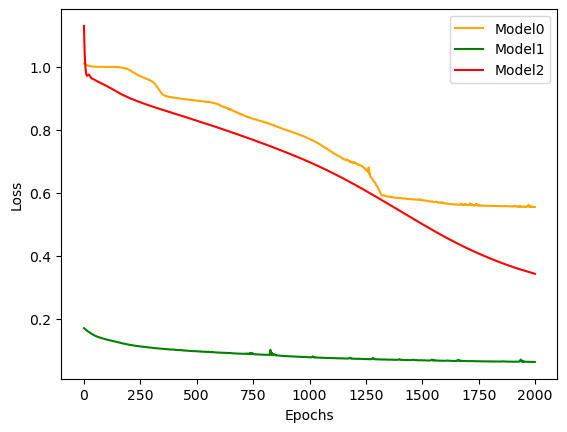

In [91]:
import matplotlib.pyplot as plt

# Plot the loss curves for all models using F2
plt.plot(range(epochs), mod0_losses_f2.numpy(), 'orange', label='Model0')  # Red for Model 0
plt.plot(range(epochs), mod1_losses_f2.numpy(), 'green', label='Model1')  # Green for Model 1
plt.plot(range(epochs), mod2_losses_f2.numpy(), 'red', label='Model2')  # Blue for Model 2

# Adding legend and labels
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Display the plot
plt.show()


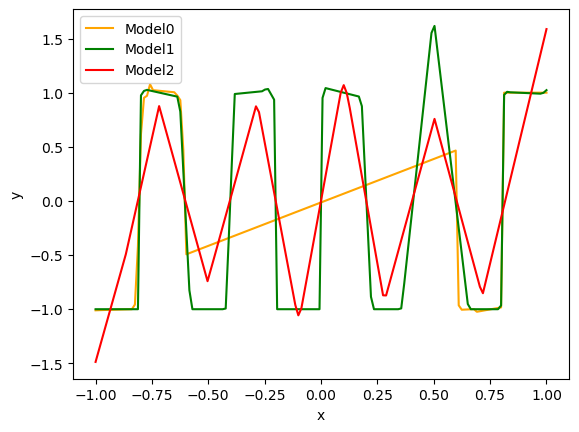

In [90]:
import matplotlib.pyplot as plt

# Plot the predicted values for all models using F2
plt.plot(X1.numpy(), y_pred_mod0_f2.detach().numpy(), 'orange', label='Model0')  # Red for Model 0
plt.plot(X1.numpy(), y_pred_mod1_f2.detach().numpy(), 'green', label='Model1')  # Green for Model 1
plt.plot(X1.numpy(), y_pred_mod2_f2.detach().numpy(), 'red', label='Model2')  # Blue for Model 2

# Adding legend and labels
plt.legend()
plt.ylabel('y')
plt.xlabel('x')

# Display the plot
plt.show()
